<a href="https://colab.research.google.com/github/manthra16695/Code-360/blob/main/Manipal_Hospitals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
data=pd.read_csv('/content/sample_data/Manipal_Train.csv')

In [2]:
data.head()

,SN,HospitalNo2,MaritalStatus,AgeYrs,Sex,BedCategory,Department,Estimatedcost,InsPayorcategory,State,Country,STATEZONE,CE_ACCESSIBILITY,CE_CSAT,CE_VALUEFORMONEY,EM_IMMEDIATEATTENTION,EM_NURSING,EM_DOCTOR,EM_OVERALL,AD_TIME,AD_TARRIFFPACKAGESEXPLAINATION,AD_STAFFATTITUDE,INR_ROOMCLEANLINESS,INR_ROOMPEACE,INR_ROOMEQUIPMENT,INR_ROOMAMBIENCE,FNB_FOODQUALITY,FNB_FOODDELIVERYTIME,FNB_DIETICIAN,FNB_STAFFATTITUDE,AE_ATTENDEECARE,AE_PATIENTSTATUSINFO,AE_ATTENDEEFOOD,DOC_TREATMENTEXPLAINATION,DOC_ATTITUDE,DOC_VISITS,DOC_TREATMENTEFFECTIVENESS,NS_CALLBELLRESPONSE,NS_NURSESATTITUDE,NS_NURSEPROACTIVENESS,NS_NURSEPATIENCE,OVS_OVERALLSTAFFATTITUDE,OVS_OVERALLSTAFFPROMPTNESS,OVS_SECURITYATTITUDE,DP_DISCHARGETIME,DP_DISCHARGEQUERIES,DP_DISCHARGEPROCESS,AdmissionDate,DischargeDate,LengthofStay,CE_NPS,NPS_Status
0,1,35236,Single,4.0,F,SPECIAL,PEDIATRIC,25000.0,PATIENT,Karnataka,INDIA,SOUTH,4,4,4,4,4,4,4,4,4,4,4,4,4,4,2,4,2,4,4,4,3,4,4,4,4,4,4,4,4,4,4,4,4,4,4,7/18/2014,7/21/2014,3,9,Promotor
1,2,35237,Single,13.0,F,SPECIAL,PEDIATRIC,15000.0,PATIENT,Karnataka,INDIA,SOUTH,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,7/11/2014,7/16/2014,5,10,Promotor
2,3,35234,Married,33.0,F,SEMISPECIAL,GYNAEC,70000.0,EXEMPTION,Karnataka,INDIA,SOUTH,3,2,2,4,4,4,4,3,3,4,3,3,3,3,2,3,3,4,4,4,3,4,4,4,4,4,4,4,4,4,4,4,3,4,3,6/17/2014,7/20/2014,33,7,Passive
3,4,35232,Married,51.0,F,SPECIAL,GYNAEC,150000.0,PATIENT,West Bengal,INDIA,EAST,4,4,3,4,4,4,4,4,4,4,3,4,4,3,3,4,4,4,3,4,3,4,4,4,4,4,4,3,4,4,3,3,3,4,3,7/16/2014,7/22/2014,6,10,Promotor
4,5,35233,Married,31.0,F,SPECIAL,GYNAEC,100000.0,INSURANCE,Karnataka,INDIA,SOUTH,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,7/13/2014,7/16/2014,3,10,Promotor


In [3]:
data.isnull().sum()

SN                                0
HospitalNo2                       0
MaritalStatus                     0
AgeYrs                            0
Sex                               0
BedCategory                       0
Department                        0
Estimatedcost                     0
InsPayorcategory                  0
State                             0
Country                           0
STATEZONE                         0
CE_ACCESSIBILITY                  0
CE_CSAT                           0
CE_VALUEFORMONEY                  0
EM_IMMEDIATEATTENTION             0
EM_NURSING                        0
EM_DOCTOR                         0
EM_OVERALL                        0
AD_TIME                           0
AD_TARRIFFPACKAGESEXPLAINATION    0
AD_STAFFATTITUDE                  0
INR_ROOMCLEANLINESS               0
INR_ROOMPEACE                     0
INR_ROOMEQUIPMENT                 0
INR_ROOMAMBIENCE                  0
FNB_FOODQUALITY                   0
FNB_FOODDELIVERYTIME        

In [4]:
data=data.drop(['SN','HospitalNo2'],axis=1)


In [5]:
catlist=['Sex','BedCategory','Department','InsPayorcategory','State','Country','STATEZONE']
numlist=['AgeYrs','Estimatedcost','LengthofStay','CE_NPS']

for i in numlist:
  data[i]=data[i].astype('int')




In [6]:
##To Segregate Numeric and Categorical variables
ls=list(data.columns.values)

for i in ls:
  if i in numlist:
    ls.remove(i)

In [7]:
for i in ls:
  data[i]=data[i].astype('object')
# data['MaritalStatus']=data['MaritalStatus'].astype('category')

In [8]:
data['AdmissionDate']=pd.to_datetime(data['AdmissionDate'])
data['DischargeDate']=pd.to_datetime(data['DischargeDate'])

In [9]:
import numpy as np

for columns in ls:
  unique_vals=np.unique(data[columns])
  nr_value=len(unique_vals)
  if nr_value<20:
    print('The Number of values for feature {} is {} and the unique values are {}'.format(columns,nr_value, unique_vals))

The Number of values for feature MaritalStatus is 5 and the unique values are ['Divorced' 'Married' 'Separated' 'Single' 'Widowed']
The Number of values for feature Sex is 2 and the unique values are ['F' 'M']
The Number of values for feature BedCategory is 11 and the unique values are ['CCU' 'DAYCARE' 'GENERAL' 'GENERAL HD' 'ITU' 'Renal ICU' 'SEMISPECIAL'
 'SEMISPECIAL HD' 'SPECIAL' 'ULTRA DLX' 'ULTRA SPL']
The Number of values for feature Department is 7 and the unique values are ['CARDIOLOGY' 'GEN' 'GYNAEC' 'ORTHO' 'PEDIATRIC' 'RENAL' 'SPECIAL']
The Number of values for feature InsPayorcategory is 5 and the unique values are ['CORPORATE' 'EXEMPTION' 'INSURANCE' 'INTERNATIONAL' 'PATIENT']
The Number of values for feature STATEZONE is 7 and the unique values are ['CENTRAL' 'EAST' 'INTERNATIONAL' 'NORTH' 'SOUTH' 'Unknown' 'WEST']
The Number of values for feature CE_ACCESSIBILITY is 4 and the unique values are [1 2 3 4]
The Number of values for feature CE_CSAT is 4 and the unique values

In [10]:
##One hot encoding for categorical variable with 
# data=pd.get_dummies(data,columns=['MaritalStatus','Sex','BedCategory','Department','InsPayorcategory','STATEZONE'])



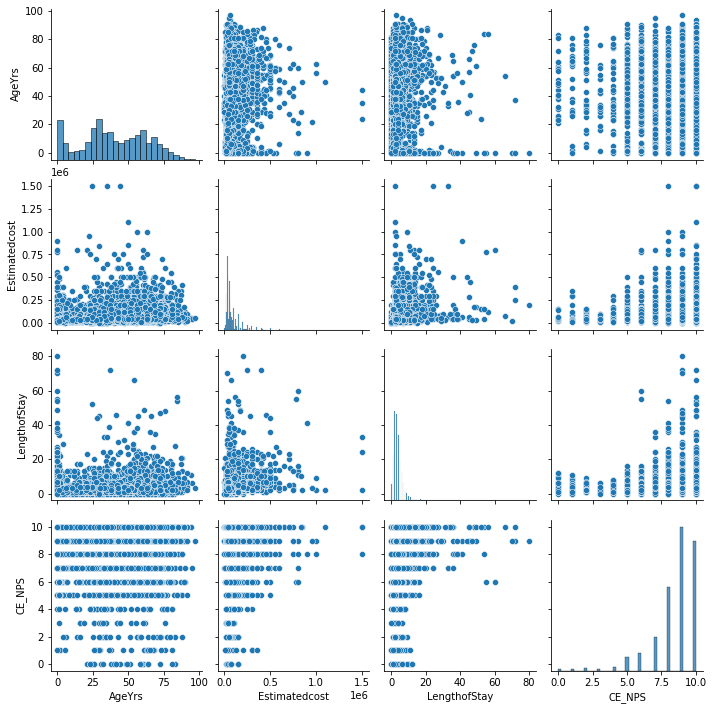

In [12]:
##Exploratory Data Analysis
import matplotlib.pyplot as plt
import seaborn as sns

numericaldata=data[['AgeYrs','Estimatedcost','LengthofStay','CE_NPS','']]
sns.pairplot(numericaldata,hue=)
